In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import cufflinks as cf

pyo.init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('data/Stud_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Data checks performed

* Missing Values
* Duplicates
* Data types
* Number of unique values of each column
* Statistic of dataset
* Various categories present in the categorical columns
  

In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total score                    0
Average                        0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Exploration

* Unique categories present the dataset
* No of Categorical and Numerical Columns
* Feature Engineering


In [41]:
print("Categories in 'gender'", end =" " )
print(df['gender'].unique())

print("\nCategories in 'race/ethnicity' :",end =" ")
print(df['race/ethnicity'].unique())

print("\nCategories in 'parental level education' : ",end="")
print(df['lunch'].unique())

print("\nCategories in 'lunch' :", end = " ")
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' : ",end =" ")
print(df['test preparation course'].unique())

Categories in 'gender' ['female' 'male']

Categories in 'race/ethnicity' : ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level education' : ['standard' 'free/reduced']

Categories in 'lunch' : ['standard' 'free/reduced']

Categories in 'test preparation course' :  ['none' 'completed']


In [49]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Numerical features : {len(numeric_features)}, {numeric_features}")
print(f"Categorical features : {len(categorical_features)}, {categorical_features}")


Numerical features : 3, ['math score', 'reading score', 'writing score']
Categorical features : 5, ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [51]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [64]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f"No of students got full marks in 'Reading' : {reading_full}")
print(f"No of students got full marks in 'Writing' : {writing_full}")
print(f"No of students got full marks in 'Maths' : {math_full}")


No of students got full marks in 'Reading' : 17
No of students got full marks in 'Writing' : 14
No of students got full marks in 'Maths' : 7


In [69]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <=20]['Average'].count()
math_less_20 = df[df['math score'] <= 20]['Average'].count()

print(f"No of students got less than 20 in 'Reading : {reading_less_20}")
print(f"No of students got less than 20 in 'Writing' : {writing_less_20}")
print(f"No of students got less than 20 in 'Maths' : {math_less_20}")

No of students got less than 20 in 'Reading : 1
No of students got less than 20 in 'Writing' : 3
No of students got less than 20 in 'Maths' : 4


# Visualize the data


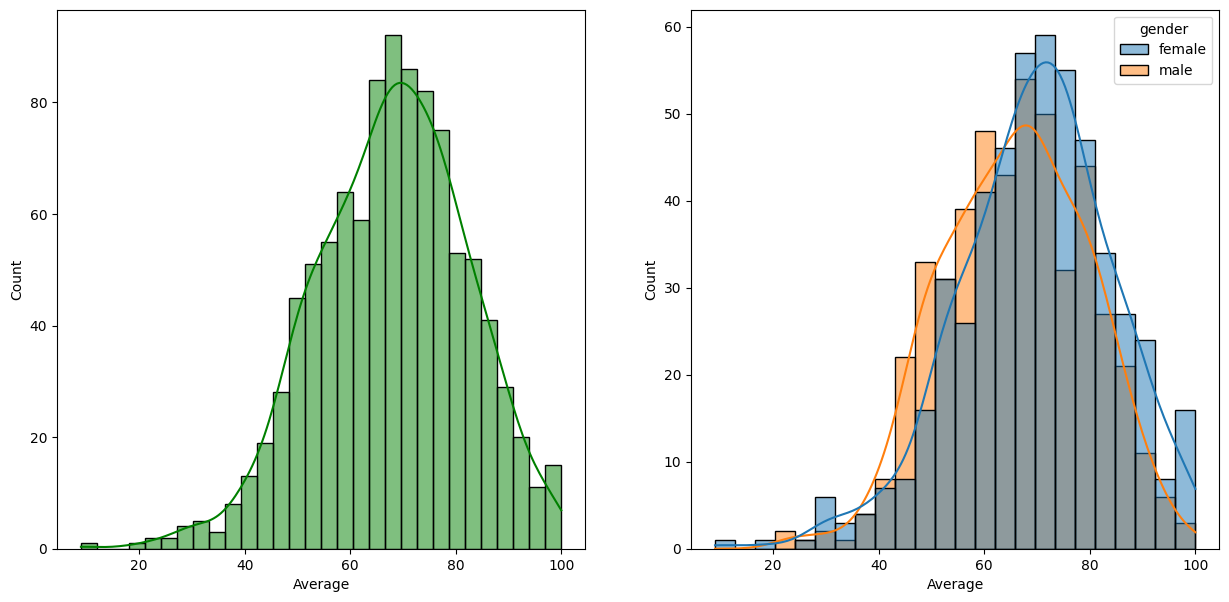

In [119]:
fig,axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

#female students performs well than male students

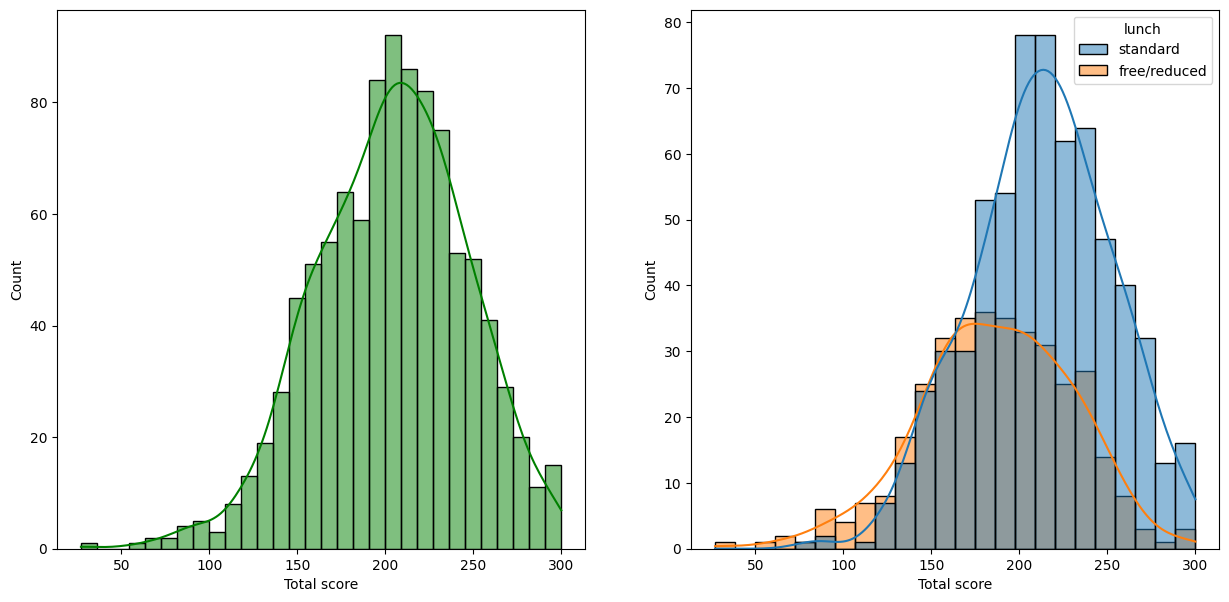

In [ ]:
fig,axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='lunch')
plt.show()

#female students performs well than male students

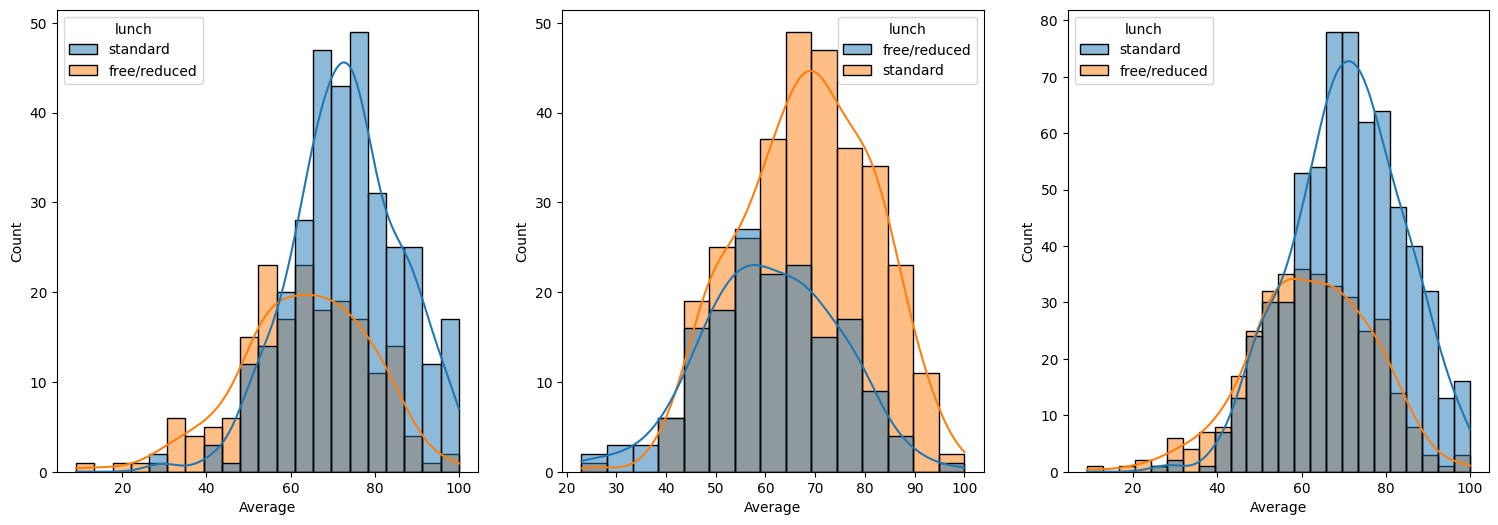

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x = 'Average',kde = True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x = 'Average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data=df,x = 'Average',kde = True,hue = 'lunch')
plt.show()

#Standard lunch helps students perform well in exams.

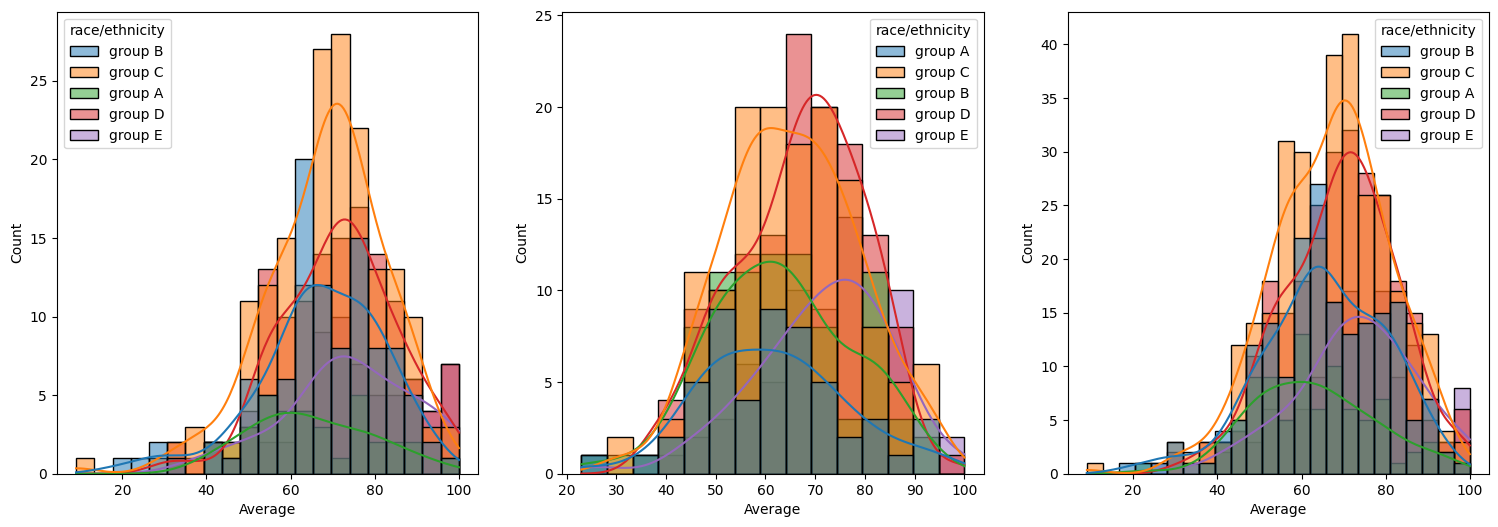

In [132]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x = 'Average',kde = True,hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x = 'Average',kde = True,hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data=df,x = 'Average',kde = True,hue = 'race/ethnicity')
plt.show()

In [108]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
